In [ ]:
# encoding=utf8

# Linear Regression Analysis


In [1]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import preprocessing
from pandas.tools.plotting import scatter_matrix
import numpy as np
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import plotly.offline as py


/Users/bater.makhabel/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
#Import Data

In [3]:
mpg_regression = pd.read_csv("../../DataSets/pybk016master/Ex04_Mpg_Regression.csv")

In [4]:
mpg_regression.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500


## Correlation Matrix and Scatter Matrix

In [5]:
corr = mpg_regression.corr()

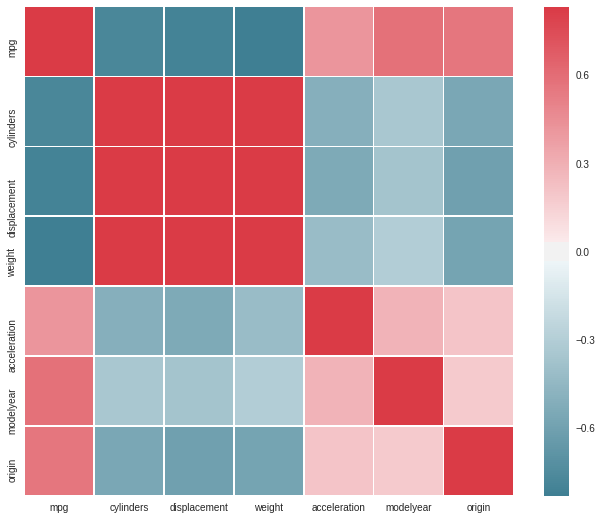

In [6]:
sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, ax=ax)
plt.show()

## Linear regression

In [9]:
mpg_x = mpg_regression.loc[:,'cylinders':'modelyear']


In [10]:
mpg_y = mpg_regression.loc[:,'mpg']

In [11]:
#using a train_test_split in-built method to divide the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(mpg_x, mpg_y, test_size = 0.8, random_state=42)

In [12]:
regr = linear_model.LinearRegression(normalize = True)

In [13]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [14]:
regr.coef_

array([ 1.33520015, -0.0314136 , -0.09628167, -0.00438915, -0.44978929,
        0.51652608])

In [17]:
residuals = (regr.predict(X_train) - y_train)

In [18]:
residuals = np.array(residuals)

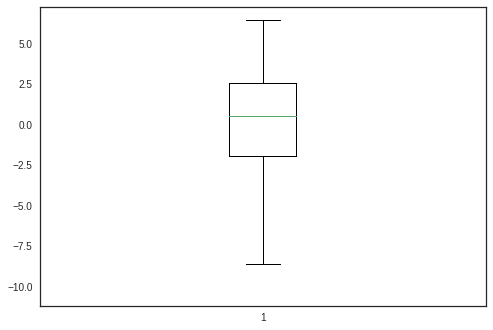

In [20]:
plt.boxplot(residuals)
plt.show()

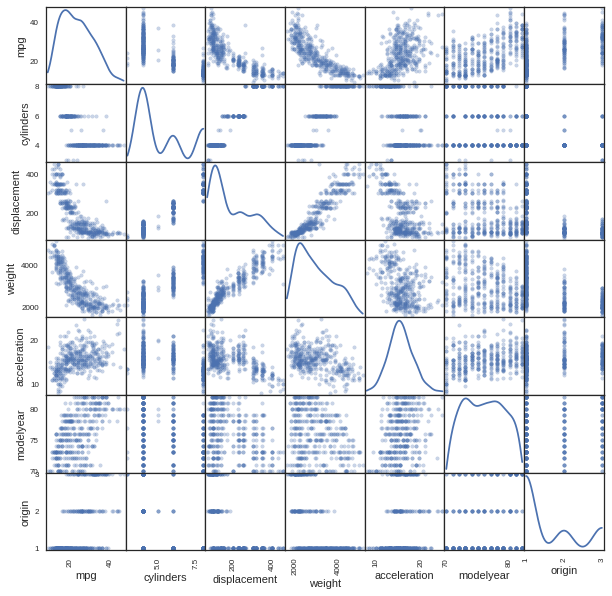

In [21]:
#Plotting the scatter matrix of the original data set to see the trend visually
scatter_matrix(mpg_regression, alpha=0.3, figsize = (10,10), diagonal='kde')
plt.show()


## OLS

In [22]:
result = sm.ols(formula = "mpg ~ cylinders + displacement + weight + acceleration + modelyear", data = mpg_regression).fit()

In [23]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     330.8
Date:                Fri, 31 Mar 2017   Prob (F-statistic):          5.21e-138
Time:                        18:33:04   Log-Likelihood:                -1051.0
No. Observations:                 397   AIC:                             2114.
Df Residuals:                     391   BIC:                             2138.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -14.7654      4.146     -3.561   

## Hypothesis Testing

In [26]:
import statsmodels.stats.diagnostic as sms

name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(result.resid, result.model.exog)
list(zip(name,test))

[('F statistics', 2.2388215680559873), ('p_value', 1.7645665893619717e-08)]

## Ridge Analysis

In [27]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [28]:
ridge = Ridge(normalize=True)
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
np.shape(coefs)

(100, 6)

In [29]:
coefs_df = pd.DataFrame(coefs, columns=sonar_x.columns.values)
coefs_df['Alpha'] = pd.DataFrame(alphas)
coefs_df.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,Alpha
0,-8.128922e-10,-1.480058e-11,-4.381726e-11,-1.700907e-12,1.893010e-10,1.864235e-10,5.000000e+09
1,-1.074596e-09,-1.956550e-11,-5.792383e-11,-2.248499e-12,2.502448e-10,2.464408e-10,3.782317e+09
2,-1.420552e-09,-2.586444e-11,-7.657190e-11,-2.972384e-12,3.308089e-10,3.257803e-10,2.861184e+09
3,-1.877886e-09,-3.419127e-11,-1.012235e-10,-3.929316e-12,4.373099e-10,4.306624e-10,2.164381e+09
4,-2.482455e-09,-4.519884e-11,-1.338116e-10,-5.194325e-12,5.780979e-10,5.693103e-10,1.637275e+09


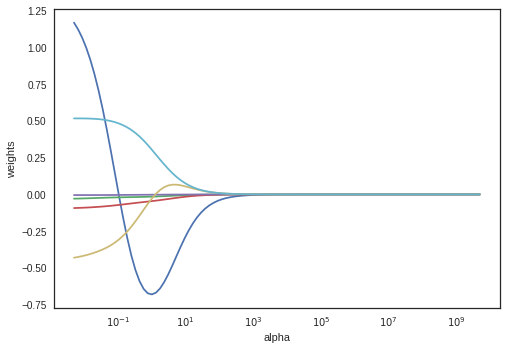

In [30]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [32]:
ridgecv = RidgeCV(alphas=alphas, scoring = 'mean_squared_error', normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

/home/user/assign2/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/assign2/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/assign2/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/assign2/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/assign2/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was 

0.046630167344160901

## Lasso Regression

In [42]:
lasso = Lasso(max_iter=10000, normalize=True)
coeffs = []

In [43]:
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coeffs.append(lasso.coef_)

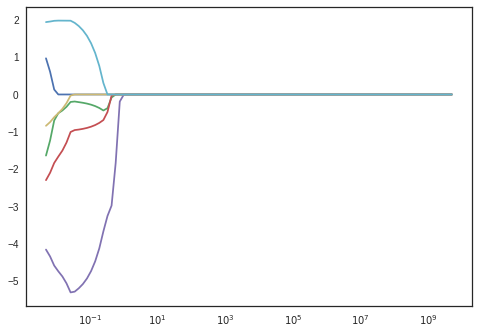

In [44]:
ax = plt.gca()
ax.plot(alphas, coeffs)
ax.set_xscale('log')

plt.show()

In [45]:
pd.Series(lasso.coef_, index = X_test.columns)

cylinders       0.968093
displacement   -1.635470
horsepower     -2.293709
weight         -4.152599
acceleration   -0.838532
modelyear       1.937950
dtype: float64